### 1a

<IPython.core.display.Javascript object>


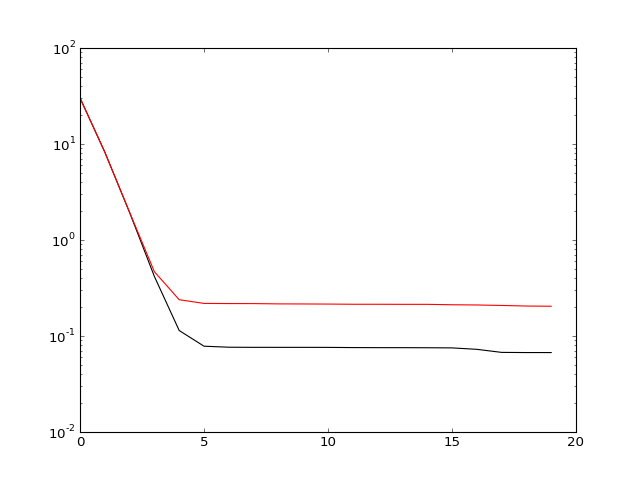

In [16]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from mpl_toolkits.mplot3d import Axes3D

d = 20
N = 10000

def lorenz(t,XYZ):
    X = XYZ[0]
    Y = XYZ[1]
    Z = XYZ[2]
    return [10 * (Y - X),
           X * (28 - Z) - Y,
           X * Y - 8 / 3 * Z]

def signal(t0,v0):
    r = ode(lorenz).set_integrator('dopri5')
    r.set_initial_value( v0, t0)
    dt = 0.01
    t1 = N * dt
    
    result = np.zeros((t1/dt + 1,3))
    while r.successful() and r.t < t1:
        result[r.t / dt,:] = r.integrate(r.t+dt)
    return [result[:,0], result[:,0] + np.random.normal(scale=0.2,size=len(result[:,0]))]

v0 = np.array([1,1,1])                                          
s, s_n = signal(0,v0)
s = s - np.mean(s)
s_n = s_n - np.mean(s)

X = np.zeros(( N-d+1,d))
X_n = np.zeros(( N-d+1,d))

for t in range(0,20):
    X[:,t] = s[t:-d+t]
    X_n[:,t] = s_n[t:-d+t]
X = X / np.sqrt(N)
X_n = X_n / np.sqrt(N)

U,S,V = np.linalg.svd(X)
U_n,S_n,V_n = np.linalg.svd(X_n)
#S

plt.figure()
plt.semilogy(S,"k")
plt.semilogy(S_n,"r")
plt.show()


### 1b

PCA 2D


<IPython.core.display.Javascript object>


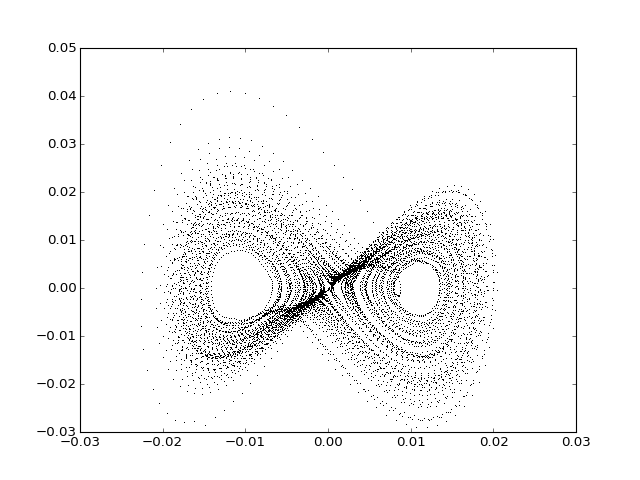

PCA 3D


<IPython.core.display.Javascript object>


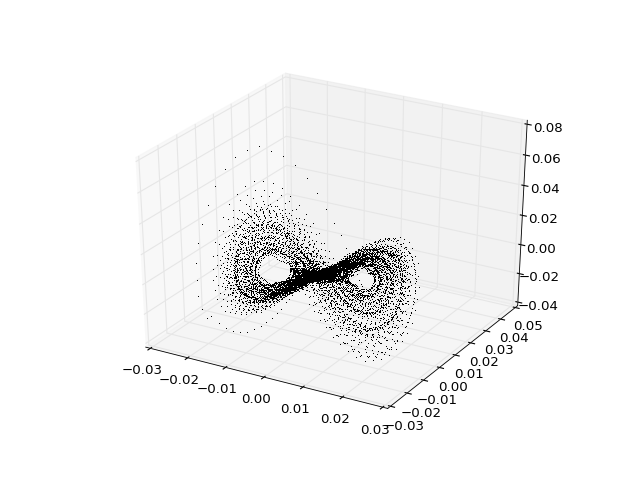

Delay 2D


<IPython.core.display.Javascript object>


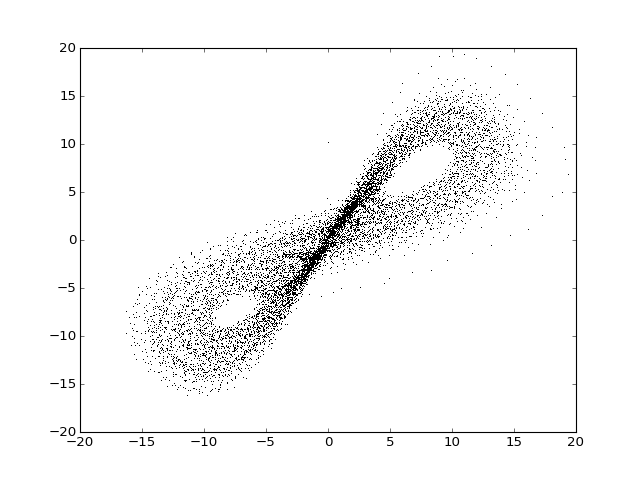

Delay 3D


<IPython.core.display.Javascript object>


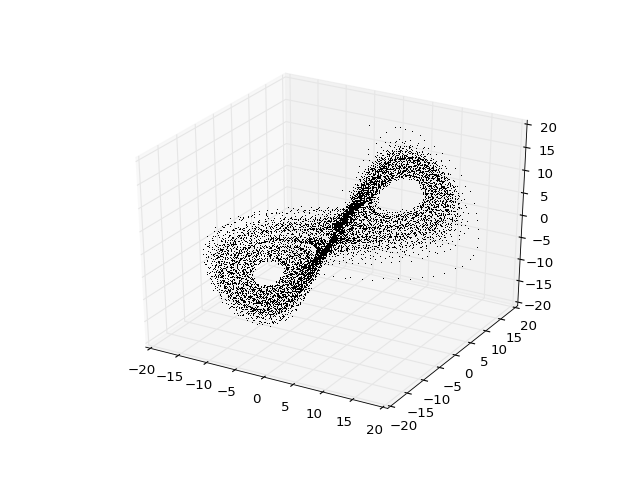

In [24]:
%matplotlib notebook


print("PCA 2D")
fig = plt.figure()
plt.plot(U_n[:,0],U_n[:,1],',k')
plt.show()

print("PCA 3D")
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(U_n[:,0],U_n[:,1],U_n[:,2],',k')
plt.show()

tau = 10

print("Delay 2D")
x = s_n[:-tau]
y = s_n[tau:]

plt.figure()
plt.plot(x,y,',k')
plt.show()

print("Delay 3D")
x = s_n[:-2*tau]
y = s_n[tau:-tau]
z = s_n[2*tau:]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x,y,z,',k')
plt.show()
